# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [40]:
import pandas as pd

In [41]:
data = pd.read_csv('train.csv')

In [64]:
data.head()

(222,)

In [45]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [46]:
train.isna().sum()

id             0
keyword       44
location    1760
text           0
target         0
dtype: int64

In [47]:
test.isna().sum()

id            0
keyword      17
location    773
text          0
target        0
dtype: int64

In [48]:
train = train.fillna("")
test = test.fillna("")

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?
2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [99]:
import numpy as np
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)

In [83]:
train["target"].value_counts()

0    3024
1    2305
Name: target, dtype: int64

In [84]:
ind = train["keyword"].value_counts().head(10).index

In [85]:
df_new = pd.DataFrame(train[['keyword','target']].value_counts())
df_new = df_new.reset_index()
df_new

,keyword,target,0
0,wreckage,1,34
1,,1,32
2,siren,0,31
3,electrocute,0,27
4,screaming,0,27
...,...,...,...
429,suicide%20bomber,0,1
430,suicide%20bomb,0,1
431,inundation,1,1
432,ruin,1,1


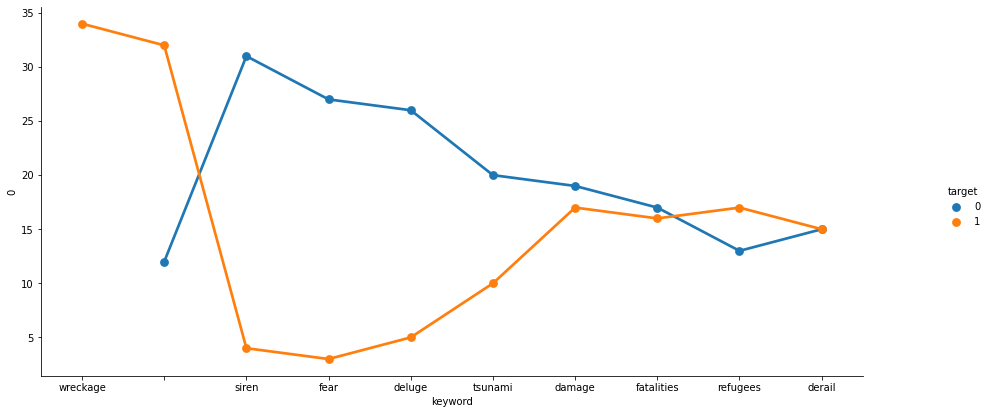

In [86]:
import seaborn as sn

g = sn.catplot(x="keyword",y=0,hue = 'target',data=df_new[df_new['keyword'].isin(ind)],kind="point")
g.fig.set_size_inches(15,6)

Классов под номером "0" больше, чем под номером "1". Однако, она "непрекошена".

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [87]:
text = pd.DataFrame(train[['keyword','location','text']].apply("".join, axis=1))
target = pd.DataFrame(train['target'])
train_n =pd.concat([text,target],axis=1)

text = pd.DataFrame(test[['keyword','location','text']].apply("".join, axis=1))
target = pd.DataFrame(test['target'])
test_n =pd.concat([text,target],axis=1)
train_n.rename(columns={0:'text'},inplace=True)
train_n

,text,target
1186,bridge%20collapseAshes 2015: AustraliaÛªs col...,0
4071,"hailCarol Stream, IllinoisGREAT MICHIGAN TECHN...",1
5461,policeHouston CNN: Tennessee movie theater sho...,1
5787,riotingStill rioting in a couple of hours left...,1
7445,woundsLake HighlandsCrack in the path where I ...,0
...,...,...
5226,obliterationMerica!@Eganator2000 There aren't ...,0
5390,panicjust had a panic attack bc I don't have e...,0
860,bloodOmron HEM-712C Automatic Blood Pressure M...,0
7603,Officials say a quarantine is in place at an A...,1


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [142]:
from sklearn.feature_extraction.text import CountVectorizer
pd.set_option('display.max_colwidth', 100)
cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(train_n['text'])
cnt_vec.vocabulary_

{'bridge': 4091,
 '20collapseashes': 504,
 '2015': 297,
 'australia': 2943,
 'ûªs': 22707,
 'collapse': 5237,
 'at': 2820,
 'trent': 20306,
 'among': 2350,
 'worst': 21971,
 'in': 11061,
 'history': 10473,
 'england': 7870,
 'bundled': 4222,
 'out': 15090,
 'for': 9084,
 '60': 1403,
 'http': 10695,
 'co': 5182,
 't5trhjuau0': 19380,
 'hailcarol': 9993,
 'stream': 18995,
 'illinoisgreat': 10989,
 'michigan': 13511,
 'technique': 19526,
 'camp': 4474,
 'b1g': 3074,
 'thanks': 19699,
 'to': 20008,
 'bmurph1019': 3851,
 'hail_youtsey': 9986,
 'termn8r13': 19586,
 'goblue': 9674,
 'wrestleon': 22109,
 'oaskgki6qj': 14664,
 'policehouston': 15805,
 'cnn': 5175,
 'tennessee': 19568,
 'movie': 13876,
 'theater': 19710,
 'shooting': 18069,
 'suspect': 19282,
 'killed': 12076,
 'by': 4323,
 'police': 15800,
 'di8elzswnr': 6877,
 'riotingstill': 17117,
 'rioting': 17099,
 'couple': 5651,
 'of': 14773,
 'hours': 10651,
 'left': 12510,
 'until': 20834,
 'have': 10159,
 'be': 3318,
 'up': 20845,
 'c

In [140]:
a = 'ûªs'
a.isalnum()

True

In [134]:
len(cnt_vec.get_feature_names())

22738

In [102]:
X.shape
X


<5329x22738 sparse matrix of type '<class 'numpy.int64'>'
	with 84366 stored elements in Compressed Sparse Row format>

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [138]:
def ans(l):
    num = 0
    punct = 0
    htags = 0
    rem = 0
    for x in l:
        if x.replace(' ','').isalnum():
            if any(map(str.isdigit,x)):
                num += 1
        else:
            punct +=1
        if x[0] == '#':
            htags +=1
        if x[0] == '@':
            rem +=1
    return {'Слов, содержащих цифры': num,'Слов, содержащих знаки пунктуации':punct,'Слов-хештегов':htags, 'Слов-упоминаний':rem}

        
            
    

In [139]:
print(ans(cnt_vec.get_feature_names()))

{'Слов, содержащих цифры': 4539, 'Слов, содержащих знаки пунктуации': 317, 'Слов-хештегов': 0, 'Слов-упоминаний': 0}


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [ ]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.
2. Обучите LogisticRegression на полученных признаках.
3. Посчитайте метрику f1-score на тестовых данных.

## Задание 9 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество?
2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?
3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 5000.
2. Какой из подходов показал самый высокий результат?

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.